# Theis well near a river

Assume we have a well near a river that is in good contact with the aquifer. For the rest, the aquifer extends to infinity.

To simulate the well in relation to the river we need a mirror well at the opposite side, with opposite flow.

The Theis well drawdown is

$$ s = \frac {Q_0} {4 \pi kD} W(u) $$

where

$$ W(u) = exp1(u)$$

the exponential integral, and

$$ u = \frac {r^2 S} { 4 kD t} $$



The flow throug a ring with radius $r$ caused by such as well equals

$$ Q_r = Q_0 e^{-u} $$



Assume the river is straight along the y axis, and that the well is at point ($-a,\, 0$) and has a constant extraction $Q$ starting at $t=0$.

To simulate a river that causes a constant head in the groundwater, we just place a mirror well with opposite flow at the other side of the river shore, at location ($+a,\, 0$)

We will first compute the drawdown in an arbitrary point, not necessarily at the river shore. Next we well compute the inflow from the river. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
W = sp.exp1

In [3]:
kD = 600 # m2/d
S = 0.2 # [-]
x0 = 250 # m # distance from river
Q = 1200 # m3/d, extraction of te real well
r0 = 0.25 # well radius
t = 1.0 # d
a = 125 # m distance between well and river shore

# locations of well, mirror well an observation points
x1, y1 = -a, 0.  # location of extraction well
x2, y2 = +a, 0.  # location of mirror well
x0, y0 = 50., 100.  # location of observation point

r1 = np.sqrt((x1 - x0)**2 + (y1 - y0)**2)
r2 = np.sqrt((x2 - x0)**2 + (y2 - y0)**2)

u1 = r1 ** 2 * S / (4 * kD * t)
u2 = r2 ** 2 * S / (4 * kD * t)

# drawdown
s = Q /(4 * np.pi * kD) * (W(u1) - W(u2)) # minus because mirror well has opposite Q

print("The ddn s at x0={:.1f}, y0={:.1f} at t={:.2f} d with Q={:.0f} m3/d equals {:.2f} m"\
      .format(x0, y0, t, Q, s))
                       

The ddn s at x0=50.0, y0=100.0 at t=1.00 d with Q=1200 m3/d equals -0.02 m


## Many observation points

Instead of 1 observation point, we can take many, for instance along a line throug both wells.

To prevent that the distance r becomes zero at the cell center, we set the minimum distance equal to the well radius $r_w$, which will normally be around 0.25 m.

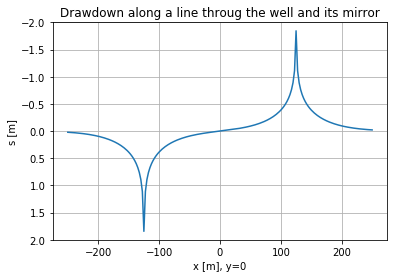

In [4]:
# Drawdown as arbitraty points x, y
x  = np.linspace(-2 * a, 2 * a, 201)
y  = np.zeros_like(x)
rw = 0.25 # well radius (radius of borehole)

r1 = np.sqrt((x1 - x)**2 + (y1 - y)**2)
r2 = np.sqrt((x2 - x)**2 + (y2 - y)**2)

# Use logical indexing to set only a limited number of points
# Logical indexing gives as many values as the array that are 
# True of correct and False otherwise. Only the True values will be set.
r1[r1<rw] = rw
r2[r2<rw] = rw

u1 = r1**2 * S / (4 * kD * t)
u2 = r2**2 * S / (4 * kD * t)

s = Q / (4 * np.pi *kD) * (W(u1) - W(u2))
plt.title('Drawdown along a line throug the well and its mirror')
plt.xlabel('x [m], y=0')
plt.ylabel('s [m]')
plt.grid()
plt.plot(x, s)
plt.ylim(2, -2) # invert the direction of the y-axis

plt.show()

# Compute the flow across a ring with radius r

The total flow across a ring with radius $r$ around a transient well is

$$ Q_r = Q_0 e^{-u} $$

And the specific discharge

$$ q_r = \frac {Q_0} {2 \pi r} e^{-u} $$

and points in the direction of the well.

#### The specific discharge as randomly chosen points around a well

Here we have a single well in location x0, y0 and a set random points with coordinates in the arrays x, and y.

The specific discharge is computed at all points. Then we compute the x and y components of these vectors. Finally we show them in a simple way, in which the point is indicated by a small circle and the discharge vector by a line with length proportional to its strength.

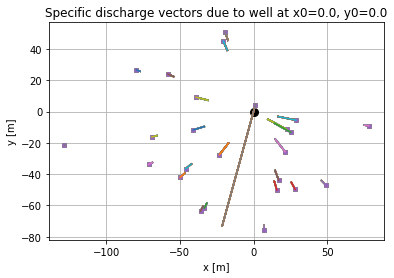

In [15]:
Q0 = 1200 # m3/d Well
x0, y0 = 0., 0.  # the location of the well

# The random observation points
a = 50 # m  a length to scale randomly chosen points
x = a * (np.random.randn(25) - 0.5)  # choose 25 random values
y = a * (np.random.randn(25) - 0.5)  # same

# Distance from each point to the well
r = np.sqrt((x-x0)**2 + (y-y0)**2)

# u
u = r**2 * S /(4 * kD * t)

# the specific discharge
q = Q0 / (2 * np.pi * r) * np.exp(-u) # m2/d
alpha = np.arctan2(y - y0, x- x0) # angle between vector and horizontal
qx = q * np.cos(alpha)   # x component of specific discharge
qy = q * np.sin(alpha)   # y component of specific discharge

scale = 2.0 # scale factor to plot specific discharge vectors

# plot the location of the well as  black ('k') circle ('o') of size 8
plt.plot(x0, y0, 'ko', markersize=8)

# in a loop, plot one vector after another
for xx, yy, qxx, qyy in zip(x, y, qx, qy):
    plt.plot(x, y, 'o', markersize=4)    # plot marker at obs. point
    plt.plot([x, x - scale * qx], [y, y - scale * qy]) # plot vector

# embelishment of the plot
plt.title('Specific discharge vectors due to well at x0={:.1f}, y0={:.1f}'\
         .format(x0, y0))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid()

# show it all
plt.show()

## Inflow from the river

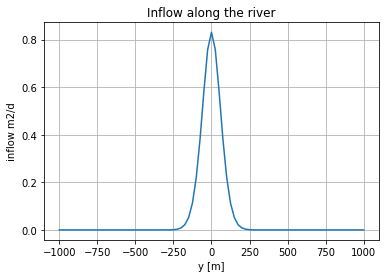

In [17]:
Q = 1200 # m3/d

b = 125 # m, distance of well to river shore
x1, y1 = -b, 0 # location of well
x2, y2 = +b, 0 # location of mirror well

y = np.linspace(-1000, 1000, 81)
x = np.zeros_like(y)

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

u1 = r1 ** 2 * S / (4 * kD * t)
u2 = r2 ** 2 * S / (4 * kD * t)

q1 = +Q / (2 * np.pi * r1) * np.exp(-u1)
q2 = -Q / (2 * np.pi * r2) * np.exp(-u2)

alpha1 = np.arctan2(y, x - x1)
alpha2 = np.arctan2(y, x - x2)

qx = q1 * np.cos(alpha1) + q2 * np.cos(alpha2)
qy = q1 * np.sin(alpha1) + q2 * np.sin(alpha2)

qin = qx

plt.title('Inflow along the river')
plt.xlabel('y [m]')
plt.ylabel('inflow m2/d')
plt.grid()
plt.plot(y, qin)
plt.show()

###  Compute the total inflow for a single time

We have to integrate the inflow along the y axis.

To do this, we take the pieces $\Delta y$ between the chosen point on the $y$ axis and multiply them with the averate value of $q_{in}$ at each piece on the $y$ axis.

In [29]:
dy = y[1:] - y[:-1]
qm = 0.5 * (qin[:-1] + qin[1:])
Qin = np.sum(qm * dy)
print('Total inflow with Q={:.0f} at t={:.1f} d equals {:.1f} m3/d'\
     .format(Q, t, Qin))

Total inflow with Q=1200 at t=200.0 d equals 1067.9 m3/d


# Show the total inflow for many times but a constant well extraction

To to this, a loop it necessary to compute the inflow for each time at a time and collect the results.

# Everything combined, many times, with varying well extraction

Every winter the extration is Q0 and during the summer it is -Q0

We simulate 10 years using superosition in time. The winter injection
will start each year in September and the summer extraction each year in april. Let's define the start times in days since the start of of the first year, assuming for simplicity that a month as always 30 days.

In [117]:
Q0 = 2400 # m3/d
kD = 500 # m2/d
S  = 0.2 # [-]

# all variable that are constant in time:

b = 1500 # m, distance of well to river shore
x1, y1 = -b, 0 # location of well
x2, y2 = +b, 0 # location of mirror well

# all parameters that are constant in time 
y = np.linspace(-1000, 1000, 81)
x = np.zeros_like(y)

dy = y[1:] - y[:-1]

r1 = np.sqrt((x - x1) ** 2 + (y - y1) ** 2)
r2 = np.sqrt((x - x2) ** 2 + (y - y2) ** 2)

alpha1 = np.arctan2(y, x - x1)
alpha2 = np.arctan2(y, x - x2)



The first time the injection is Q.
Then at each time when extraction starts, is has -2Q
And then each time when we switch back to injection the flow is +2Q

The flows to be used for superposition in time are

Month  9,  15,  21,  27,  33,  39,  45, ...

Flow   Q, -2Q, 2Q, -2Q,  2Q, -2Q,  2Q, ...

Now define the times at which the total inflow is to be computed.

In [118]:
# Set the times when pumping switches
#              start, end, step
month = np.arange(9, 120, 6) # month numbers at which flow switches
                            #counting from Jan 1 in first year
Tsw = 30 * month   # t at which flow switches in days

# set the pumping flow at the switch points
Qsw = Q0 * 2 * (-1) ** np.arange(len(Tsw))
Qsw[0] = Q0

# Show them
print('{:>6} {:>6}'.format('Tsw[d]', 'Qsw'))
for tsw, Q in zip(Tsw, Qsw):
    print('{:6.0f} {:6.0f}'.format(tsw, Q))


Tsw[d]    Qsw
   270   2400
   450  -4800
   630   4800
   810  -4800
   990   4800
  1170  -4800
  1350   4800
  1530  -4800
  1710   4800
  1890  -4800
  2070   4800
  2250  -4800
  2430   4800
  2610  -4800
  2790   4800
  2970  -4800
  3150   4800
  3330  -4800
  3510   4800


Choose times at which we want to see the total inflow

In [119]:
# The small values prevents computing flows at the time the well starts
# t is now just a negilible time later.
#            start  end      step
times = np.arange(0, 30 * 12 * 10, 10) + 0.00001  # 10 years in days in 10 day steps

Actual computation for all times